In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tqdm import tqdm

import sys
sys.path += ['../']
from utils.lr_finder import LRFinder

# Fake Model for Quick POC

LRFinder: logging loss: 100%|██████████| 400/400 [02:47<00:00,  2.39it/s] 


LRFinder: Finding `best_base_lr` range from: [1e-06(0.00000100), 1e-02(0.01318229)]...


LRFinder: logging loss:  98%|█████████▊| 390/400 [00:00<00:00, 660.05it/s]

LRFinder: best_base_lr = 3e-03(0.00349295)
Epoch 1/5
50/50 [==============================] - 0s 3ms/step - loss: 0.0842 - val_loss: 0.0841
Epoch 2/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0834 - val_loss: 0.0842
Epoch 3/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0836 - val_loss: 0.0877
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0879 - val_loss: 0.0842
Epoch 5/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1022


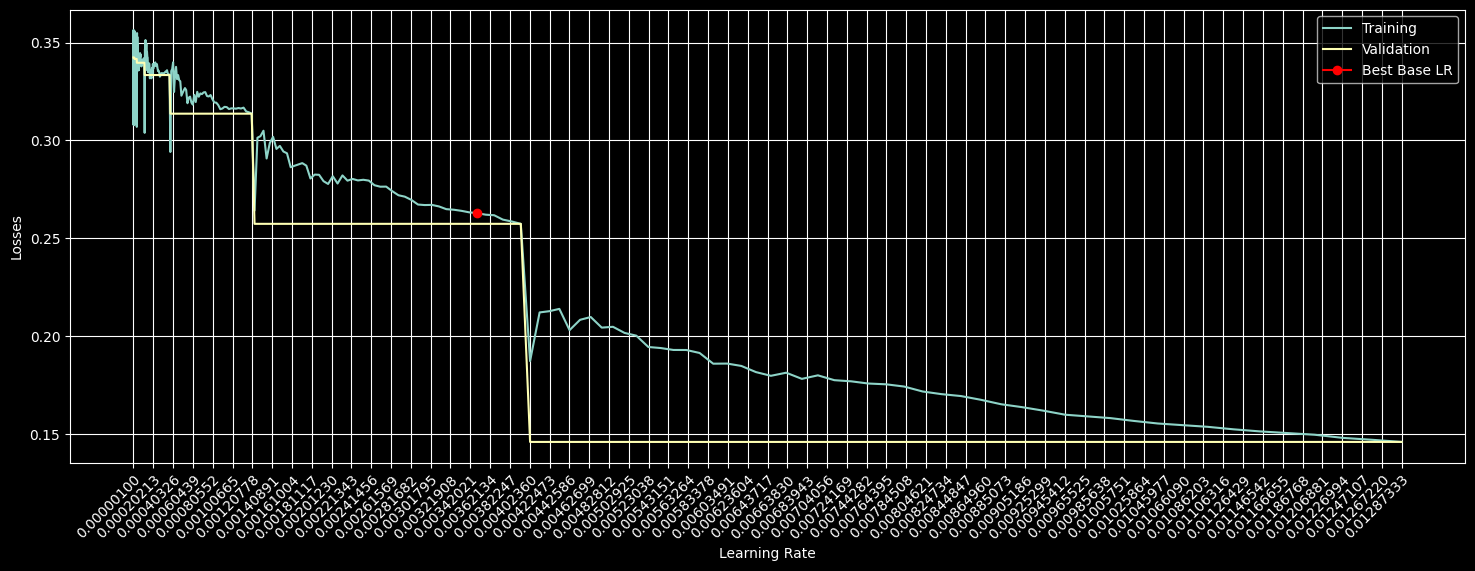

In [8]:
np.random.seed(43)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

epoch = 5
batch_size = 32
sample_size = 50
train_data = tf.data.Dataset.from_tensor_slices((np.zeros((sample_size, batch_size, 10, 3)),np.random.rand(sample_size, batch_size, 1)))
test_data = tf.data.Dataset.from_tensor_slices((np.zeros((sample_size, batch_size, 10, 3)), np.random.rand(sample_size, batch_size, 1)))

callbacks = [LRFinder(train_data, batch_size, window_size=4, max_steps=400, filename='logs/lr_finder')]
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay((4,400), epoch * len(train_data), alpha=1e-2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_decayed_fn, beta_1=0.9, beta_2=0.98, epsilon=1e-09)
model.compile(optimizer=opt, loss='mse')

model.fit(train_data, validation_data=test_data, batch_size=batch_size, epochs=5, callbacks=callbacks)

# Real Model for Validation

In [7]:
from datasets import DatasetWrapper
from models import get_model
from utils.lr_finder import LRFinder
from datasets import get_dataset
from trainers import get_trainer

class Args:
    lr = 0
    batch_size = 128
    seq_len = 8
    epochs = 5
    model = 'qnet'
    embed_size = 1
    num_blocks = 2
    qnet_depth = 1
    lr_finder = [4,400,'logs/lr_finder']

get_trainer('classification').train(Args(), get_dataset('stackoverflow'))

Num Replicas In Sync:  1


2022-11-04 08:07:15.448448: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Vocab size: 11693
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 8)                0         
 ectorization)                                                   
                                                                 
 q_net_encoder_2 (QNetEncode  (None, 8, 1)             11705     
 r)                                                              
                                                                 
 global_average_pooling1d_2   (None, 1)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 20)                40        
                                                                 
Total params: 11,745
Trainable params: 11,745
Non-trainable params: 0
_______________________________





























LRFinder: logging loss: 100%|██████████| 400/400 [02:56<00:00,  2.27it/s] 


KeyboardInterrupt: 